In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = '../datasets/Heart_Disease_Prediction.csv'
df = pd.read_csv(url)
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


<Axes: xlabel='Heart Disease', ylabel='count'>

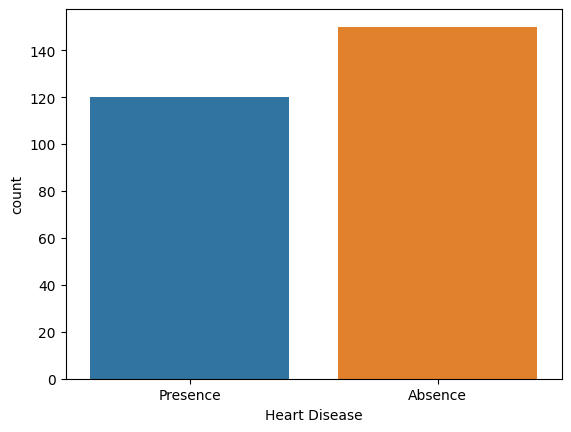

In [3]:

sns.countplot(x='Heart Disease', data=df)

In [4]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFECV
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

In [5]:
np.set_printoptions(precision=2, suppress=True)

In [6]:
X, y = df.drop('Heart Disease', axis=1), df['Heart Disease']

In [7]:
selector_1 = SelectKBest(chi2, k=5)
selector_1.fit(X, y)
for c,s in zip(X.columns, selector_1.scores_):
    print(f'{c:25}: {s:.2f}')
print(selector_1.get_feature_names_out().tolist())

Age                      : 18.49
Sex                      : 7.71
Chest pain type          : 13.33
BP                       : 15.78
Cholesterol              : 40.09
FBS over 120             : 0.06
EKG results              : 8.69
Max HR                   : 168.93
Exercise angina          : 31.82
ST depression            : 58.70
Slope of ST              : 7.30
Number of vessels fluro  : 74.12
Thallium                 : 59.46
['Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro', 'Thallium']


In [8]:
selector_2 = SelectKBest(f_classif, k=5)
selector_2.fit(X, y)
for c,s in zip(X.columns, selector_2.scores_):
    print(f'{c:25}: {s:.2f}')
print(selector_2.get_feature_names_out().tolist())

Age                      : 12.65
Sex                      : 26.07
Chest pain type          : 56.55
BP                       : 6.63
Cholesterol              : 3.79
FBS over 120             : 0.07
EKG results              : 9.19
Max HR                   : 56.91
Exercise angina          : 57.17
ST depression            : 56.73
Slope of ST              : 34.48
Number of vessels fluro  : 70.10
Thallium                 : 101.99
['Max HR', 'Exercise angina', 'ST depression', 'Number of vessels fluro', 'Thallium']


In [9]:
selector_3 = SelectKBest(mutual_info_classif, k=5)
selector_3.fit(X, y)
for c,s in zip(X.columns, selector_3.scores_):
    print(f'{c:25}: {s:.2f}')
print(selector_3.get_feature_names_out().tolist())

Age                      : 0.00
Sex                      : 0.05
Chest pain type          : 0.11
BP                       : 0.00
Cholesterol              : 0.06
FBS over 120             : 0.00
EKG results              : 0.00
Max HR                   : 0.04
Exercise angina          : 0.11
ST depression            : 0.09
Slope of ST              : 0.11
Number of vessels fluro  : 0.09
Thallium                 : 0.09
['Chest pain type', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro']


In [10]:
selector_4 = RFECV(ExtraTreeClassifier(), cv=5)
selector_4.fit(X, y)
for c,s in zip(X.columns, selector_4.ranking_):
    print(f'{c:25}: {s}')
print(selector_4.get_support(indices=True))
print(X.columns[selector_4.get_support()].tolist())

Age                      : 3
Sex                      : 4
Chest pain type          : 1
BP                       : 2
Cholesterol              : 1
FBS over 120             : 6
EKG results              : 1
Max HR                   : 1
Exercise angina          : 5
ST depression            : 1
Slope of ST              : 1
Number of vessels fluro  : 1
Thallium                 : 1
[ 2  4  6  7  9 10 11 12]
['Chest pain type', 'Cholesterol', 'EKG results', 'Max HR', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
